In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
data=pd.read_excel("data.xlsx", sheet_name=0, decimal=',', 
                  parse_dates=["Start_Date","End_Date","Reservation_Date"])

## Affichage des revenus 

In [3]:
A=data.pivot_table('Revenus', index='Statut', columns='Année', aggfunc='sum').fillna(0)

In [4]:
A

Année,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Statut,,,,,,,,,,
Acceptee,252.833333,832.531746,1275.174603,2154.698413,1790.337302,1248.607143,928.496032,2451.341270,2664.877460,116.65
Annulee,0.000000,69.047619,61.103175,528.285714,32.718254,0.000000,0.000000,0.000000,594.840000,0.00
Annulee-coronavirus,0.000000,0.000000,0.000000,0.000000,0.000000,200.833333,42.079365,0.000000,0.000000,0.00
Expiree,0.000000,91.666667,917.103175,1378.940476,1365.722222,1349.785714,1405.575397,203.126984,1271.561905,0.00
Refusee,184.365079,2850.817460,16.531746,735.706349,367.670635,524.015873,627.932540,297.234127,2110.686984,0.00


Text(0, 0.5, 'Revenus (€)')

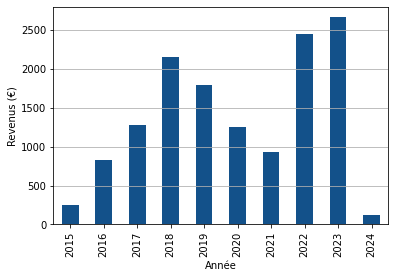

In [5]:
#Uniquement les revenus des demandes au statut acceptée
ax=A.loc["Acceptee"].plot(kind='bar', color='#13518A')
ax.grid(visible=True, axis='y')
ax.set_ylabel("Revenus (€)")

In [6]:
#Nous allons distinguer les revenus entre ceux déjà encaissés et les revenus futurs, pour les demandes de séjours acceptées
Today=dt.date.today()  #la date d'aujourd'hui sert de "pivot" dans l'analyse
A1=data[(data["Start_Date"]<str(Today))&(data["Statut"]=="Acceptee")]
A2=data[(data["Start_Date"]>=str(Today))&(data["Statut"]=="Acceptee")]
A1=A1.pivot_table('Revenus', columns='Année', aggfunc='sum')
A2=A2.pivot_table('Revenus',  columns='Année', aggfunc='sum')
A1=A1.rename(index={"Revenus" :"Revenus réalisés"})
A2=A2.rename(index={"Revenus" :"Revenus futurs"})
A12=pd.concat([A1,A2]).fillna(0)

In [7]:
A12

Année,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Revenus réalisés,252.833333,832.531746,1275.174603,2154.698413,1790.337302,1248.607143,928.496032,2451.34127,2375.67746,0.00
Revenus futurs,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,289.20000,116.65


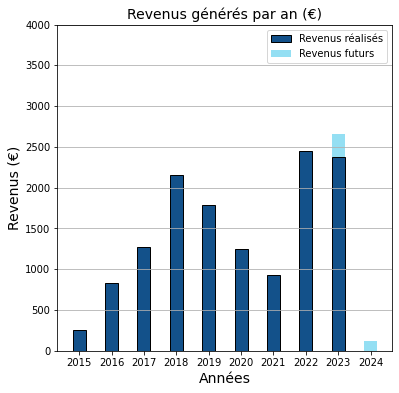

In [8]:
#Réalisation d'un graphique de types bar
width=0.4
fig, ax = plt.subplots(figsize=(6,6))
ax.bar(A12.columns, A12.iloc[0], width, label='Revenus réalisés', color="#13518A", edgecolor="black")
ax.bar(A12.columns, A12.iloc[1], width, bottom=A12.iloc[0], label='Revenus futurs', alpha=0.8, color="#7AD7F0")
ax.grid(visible=True, axis='y')
ax.set_xlabel('Années',fontsize=14)
ax.set_ylabel('Revenus (€)',fontsize=14)
ax.set_ylim(0,4000)
ax.set_title('Revenus générés par an (€)',fontsize=14)
ax.set_xticks(A12.columns)
ax.legend()
plt.show()
fig.savefig("A.jpg")

## Taux d'acceptation 

In [9]:
B=data.pivot_table('Revenus', index='Statut', columns='Année', aggfunc='count').fillna(0)
B.loc["total"]=B.sum(axis=0)
B=B/B.loc["total"]*100
B=B.drop(labels="total", axis=0)

In [10]:
B

Année,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Statut,,,,,,,,,,
Acceptee,50.0,42.857143,69.230769,56.140351,68.0,58.064516,40.0,86.206897,68.965517,100.0
Annulee,0.0,7.142857,2.564103,10.526316,2.0,0.000000,0.0,0.000000,6.896552,0.0
Annulee-coronavirus,0.0,0.000000,0.000000,0.000000,0.0,12.903226,5.0,0.000000,0.000000,0.0
Expiree,0.0,14.285714,25.641026,15.789474,18.0,22.580645,35.0,6.896552,17.241379,0.0
Refusee,50.0,35.714286,2.564103,17.543860,12.0,6.451613,20.0,6.896552,6.896552,0.0


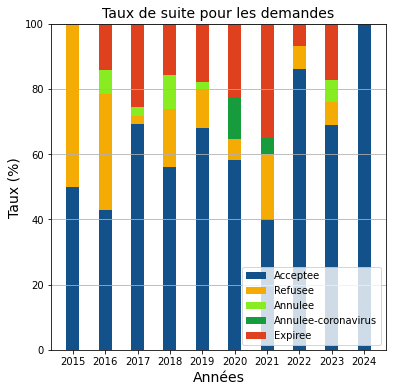

In [11]:
#Réalisation du graphique
B=B.T
color=["#13518A","#f4ac04","#87ec22","#169c3c","#df411e"]

width=0.4
fig, ax=plt.subplots(figsize=(6,6))

ax.bar(B.index, B["Acceptee"], width, label="Acceptee",color=color[0])
ax.bar(B.index, B["Refusee"],width,label="Refusee", bottom=B["Acceptee"],color=color[1])
ax.bar(B.index, B["Annulee"],width,label="Annulee",bottom=B["Acceptee"]+B["Refusee"],color=color[2])
ax.bar(B.index, B["Annulee-coronavirus"],width,label="Annulee-coronavirus",bottom=B["Acceptee"]+B["Refusee"]+B["Annulee"],color=color[3])
ax.bar(B.index, B["Expiree"],width,label="Expiree",bottom=B["Acceptee"]+B["Refusee"]+B["Annulee"]+B["Annulee-coronavirus"],color=color[4])
ax.grid(visible=True, axis='y')
#B.plot.bar(stacked="true", edgecolor='black', alpha=0.9, color=color)
ax.set_xlabel('Années',fontsize=14)
ax.set_ylabel('Taux (%)',fontsize=14)
ax.set_xticks(B.index)
plt.legend(loc="lower right")
plt.title("Taux de suite pour les demandes", fontsize=14)
#B.loc["Refusee"].plot(kind='bar')
fig.savefig("B.jpg")

## Diagramme moustache sur le délai entre la date de réservation et la date d'entrée dans les lieux

In [12]:
C=data[data["Statut"]=="Acceptee"][["Année","Délai"]]

In [13]:
#On crée une liste qui contient une restriction du dataframe par année.
X=[]
for i in C["Année"].unique():
    X.append(C[C["Année"]==i]["Délai"])

In [14]:
#Transformation de la liste en DataFrame
CC=pd.concat(X, axis=1, ignore_index=True
            )

In [15]:
#Les colonnes sont renommées par année
CC.columns=C["Année"].unique()

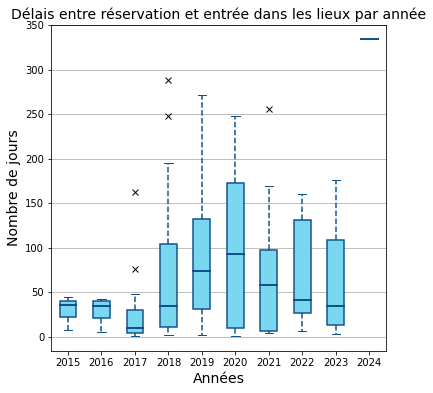

In [16]:
#Grâce à cette liste, on va pouvoir réaliser plusieurs diagramme moustache, un par année.
fig, ax = plt.subplots(figsize=(6,6))
ax=CC.boxplot(patch_artist=True, 
           boxprops = dict(color="#13518A", facecolor="#7AD7F0", alpha=1, linewidth=1.5),
           medianprops = dict(linestyle='-', linewidth=2, color='#13518A'),
           whiskerprops = dict(color='#13518A', linewidth=1.5, linestyle="--"),
           capprops = dict(c='#13518A'),
           flierprops = dict(color='#13518A', marker='x'),           
)
ax.set_xlabel('Années',fontsize=14)
ax.set_ylabel('Nombre de jours',fontsize=14)
ax.set_title('Délais entre réservation et entrée dans les lieux par année', fontsize=14)
ax.grid(visible=False, axis='x')
plt.show()
fig.savefig("C.jpg")
#https://towardsdatascience.com/create-and-customize-boxplots-with-pythons-matplotlib-to-get-lots-of-insights-from-your-data-d561c9883643

## Nombre de nuits par an 

In [17]:
D=data.pivot_table('Number_Nights', index='Statut', columns='Année', aggfunc='sum').fillna(0)

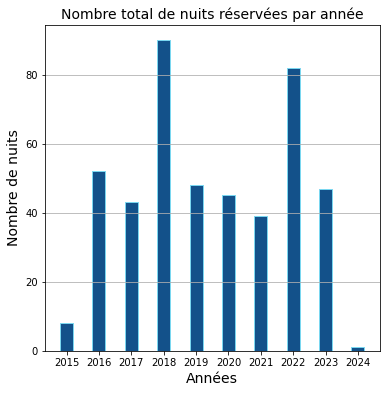

In [18]:
fig, ax = plt.subplots(figsize=(6,6))
ax.bar(D.columns,D.loc["Acceptee"], width=0.4, color="#13518A", edgecolor="#7AD7F0")
ax.set_xlabel('Années',fontsize=14)
ax.set_ylabel('Nombre de nuits',fontsize=14)
ax.set_title('Nombre total de nuits réservées par année', fontsize=14)
ax.set_xticks(D.columns)
ax.grid(visible=False, axis='x')
ax.grid(visible=True, axis='y')
plt.show()
fig.savefig("D.jpg")

## Nombre de séjours 

In [19]:
E=data.pivot_table('Number_Nights', index='Statut', columns='Année', aggfunc='count').fillna(0)

In [20]:
E

Année,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Statut,,,,,,,,,,
Acceptee,3.0,6.0,27.0,32.0,34.0,18.0,8.0,25.0,20.0,1.0
Annulee,0.0,1.0,1.0,6.0,1.0,0.0,0.0,0.0,2.0,0.0
Annulee-coronavirus,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0
Expiree,0.0,2.0,10.0,9.0,9.0,7.0,7.0,2.0,5.0,0.0
Refusee,3.0,5.0,1.0,10.0,6.0,2.0,4.0,2.0,2.0,0.0


<Figure size 1080x1080 with 0 Axes>

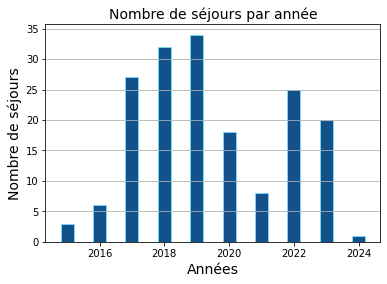

In [21]:
plt.figure(figsize=(15,15))
fig, ax = plt.subplots()
#ax=E.loc["Acceptee"].plot(kind="bar",color="#7AD7F0", edgecolor="#13518A")
ax.bar(E.columns,E.loc["Acceptee"], width=0.4,color="#13518A", edgecolor="#7AD7F0")
ax.set_xlabel('Années',fontsize=14)
ax.set_ylabel('Nombre de séjours',fontsize=14)
ax.set_title('Nombre de séjours par année', fontsize=14)
ax.grid(visible=False, axis='x')
ax.grid(visible=True, axis='y')
plt.show()
fig.savefig("E.jpg")

## Nombre de nuits par séjour 

In [22]:
EE=D.loc["Acceptee"]/E.loc["Acceptee"]

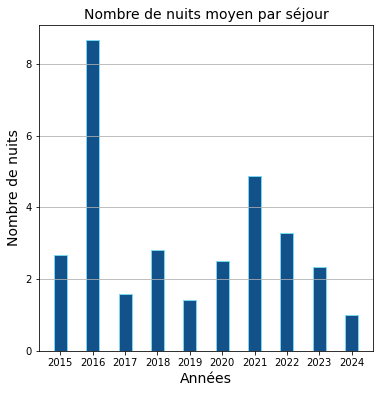

In [23]:
fig, ax = plt.subplots(figsize=(6,6))
ax.bar(EE.index,EE, width=0.4,color="#13518A",edgecolor="#7AD7F0")
ax.set_xlabel('Années',fontsize=14)
ax.set_ylabel('Nombre de nuits',fontsize=14)
ax.set_title('Nombre de nuits moyen par séjour', fontsize=14)
ax.grid(visible=False, axis='x')
ax.grid(visible=True, axis='y')
ax.set_xticks(EE.index)
plt.show()
fig.savefig("E.jpg")

## Revenus par séjours 

In [24]:
F=A.loc["Acceptee"]/E.loc["Acceptee"]

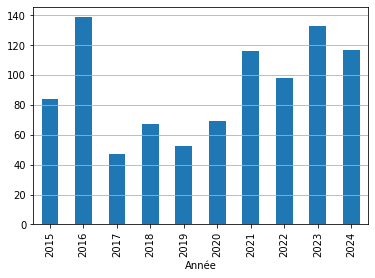

In [25]:
F.plot(kind="bar")
plt.grid(visible=True, axis='y')



## Revenus par durée 

In [26]:
G=data.pivot_table('Revenus', index='Statut', columns='Number_Nights', aggfunc='sum').fillna(0)

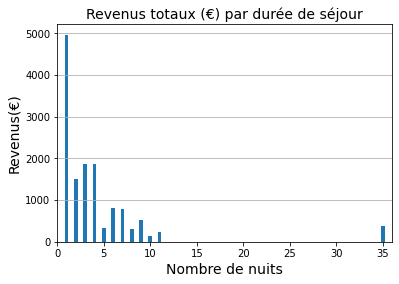

In [27]:
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(G.columns,G.loc["Acceptee"], width=0.4)
ax.set_xlabel('Nombre de nuits',fontsize=14)
ax.set_ylabel('Revenus(€)',fontsize=14)
ax.set_title('Revenus totaux (€) par durée de séjour', fontsize=14)
ax.set_xlim(0,36)
ax.grid(visible=False, axis='x')
ax.grid(visible=True, axis='y')
plt.show()
fig.savefig("G.jpg")

<AxesSubplot:ylabel='Acceptee'>

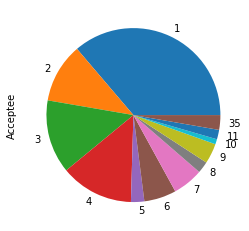

In [28]:
G.loc["Acceptee"].plot(kind="pie")

## Revenus futurs 

In [29]:
dt.date.today().day

9

In [30]:
def revenus_futurs(data,timedelta=0):
    
    """For the same date as today but last years, we compute forward revenus.
    With the feature timedelta, we can do the same computing for a different date than today

    """
    
    I=data[data["Statut"]=="Acceptee"]
    IIa=[] #to store datetime
    IIb=[] #to store revenus
    
    Today=dt.date.today()-dt.timedelta(timedelta) #We can change de date of the anlysis

    for t in I["Année"].unique():
        
        a=365*(Today.year-t) #we compute a timedelta in days
        a=int(a)
        x=pd.to_datetime(Today-dt.timedelta(a) ) #we compute the date in the past
        
        r=I[(I["Start_Date"]>x)&(I["Reservation_Date"]<=x)]["Revenus"].sum() #We compute futur revenus at the past date
        
        IIa.append(str(x.date()))  #past date is stored
        IIb.append(r) #futur revenus is stored
        
    II=pd.DataFrame(IIb, index=IIa, columns=["Revenus réservés les années d'avant"])
    
    #We eliminate date of comparison whose are in the futur
    if pd.to_datetime(II.index[-1])>pd.to_datetime(Today):
        i=II.index[-1]
        II=II.drop(index=i)
        
    #we eleminate date happened before our first booking date
    if pd.to_datetime(II.index[0])<data.iloc[0]["Start_Date"]:
        i=II.index[0]
        II=II.drop(index=i)
        
    return II

In [31]:
II=revenus_futurs(data,timedelta=100)

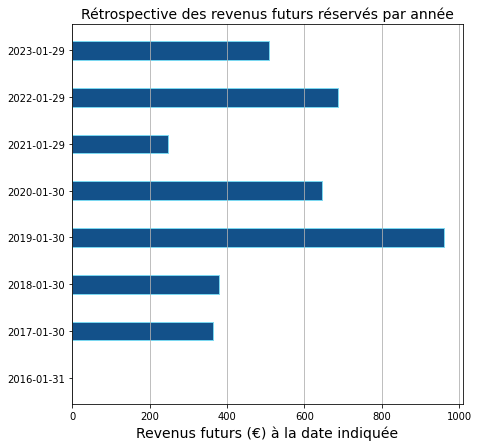

In [32]:
fig, ax = plt.subplots(figsize=(7,7))
#ax=II.plot(kind="barh", color="#13518A", edgecolor="#7AD7F0", alpha=0.8)
ax.barh(II.index,II["Revenus réservés les années d'avant"], height=0.4, color="#13518A", edgecolor="#7AD7F0") 
ax.grid(visible=True, axis="x")
ax.set_title("Rétrospective des revenus futurs réservés par année",fontsize=14)
ax.set_xlabel('Revenus futurs (€) à la date indiquée',fontsize=14)
#ax.set_ylabel('Années',fontsize=14)
plt.show()
fig.savefig("F.jpg")

## Revenus cumulés à la réservation et à la location 

In [34]:
I=data[data["Statut"]=="Acceptee"]

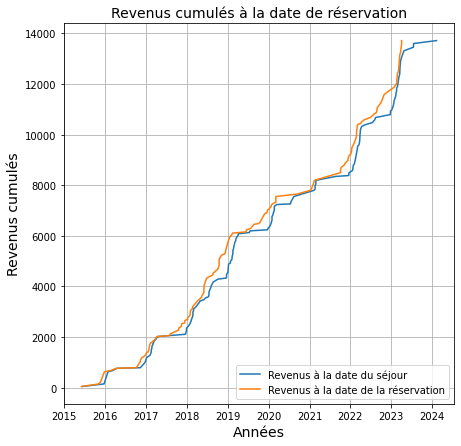

In [35]:
X=I.sort_values(by="Reservation_Date")
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(I["Start_Date"],I["Revenus"].cumsum(), label="Revenus à la date du séjour")
ax.plot(X["Reservation_Date"],X["Revenus"].cumsum(), label="Revenus à la date de la réservation")
ax.grid(visible=True, axis="both")
ax.legend(loc="lower right")
ax.set_title("Revenus cumulés à la date de réservation",fontsize=14)
ax.set_xlabel('Années',fontsize=14)
ax.set_ylabel('Revenus cumulés',fontsize=14)
plt.show()

# Analyses supplémentaires 

## Impact du délai de réservation (ou préavis)

In [36]:
#On transforme le délai, variable quantitative en classe de délais, variable qualitative
def classeDelai(D):
    if D==1:
        return "1"
    if D==2:
        return "2"
    if D==3:
        return "3"
    if 3<D<=7:
        return "4-7"
    if 7<D<=14:
        return "8-14"
    if 14<D<=30:
        return "15-30"
    if 30<D<=90:
        return "31-90"
    if D>90:
        return ">90"

In [37]:
data["Classe_délai"]=data["Délai"].apply(classeDelai)

In [38]:
J=data.pivot_table('Revenus', index='Statut', columns='Classe_délai', aggfunc='count').fillna(0)

In [39]:
#On veut calculer des taux de suite pour les demandes
J=J/J.sum(axis=0)*100

In [40]:
#Les colonnes de J sont remises dans un ordre croissant
J=J[["1","2","3","4-7","8-14","15-30","31-90",">90"]]

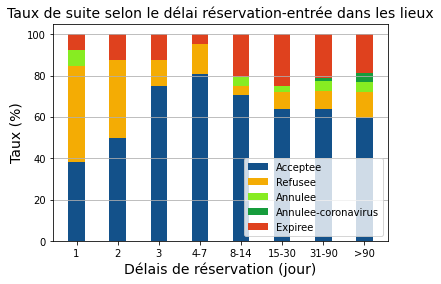

In [41]:
#Réalisation du graphique
width=0.4
color=["#13518A","#f4ac04","#87ec22","#169c3c","#df411e"]

fig, ax = plt.subplots(figsize=(6,4))

ax.bar(J.columns, J.loc["Acceptee"], width, label="Acceptee",color=color[0])
ax.bar(J.columns, J.loc["Refusee"],width,label="Refusee", bottom=J.loc["Acceptee"],color=color[1])
ax.bar(J.columns, J.loc["Annulee"],width,label="Annulee",bottom=J.loc["Acceptee"]+J.loc["Refusee"],color=color[2])
ax.bar(J.columns, J.loc["Annulee-coronavirus"],width,label="Annulee-coronavirus",bottom=J.loc["Acceptee"]+J.loc["Refusee"]+J.loc["Annulee"],color=color[3])
ax.bar(J.columns, J.loc["Expiree"],width,label="Expiree",bottom=J.loc["Acceptee"]+J.loc["Refusee"]+J.loc["Annulee"]+J.loc["Annulee-coronavirus"],color=color[4])

ax.grid(visible=True, axis='y')
ax.set_xlabel('Délais de réservation (jour)',fontsize=14)
ax.set_ylabel('Taux (%)',fontsize=14)
ax.set_title('Taux de suite selon le délai réservation-entrée dans les lieux',fontsize=14)
ax.legend(loc='lower right')
plt.show()
fig.savefig("H.jpg")

In [42]:
#Interessons nous au revenu potentiel par classe de délais
Jbis=data.pivot_table('Revenus', columns='Classe_délai', aggfunc='sum').fillna(0)

In [43]:
Jbis=Jbis[["1","2","3","4-7","8-14","15-30","31-90",">90"]]

In [44]:
Jbis=np.array(Jbis.loc["Revenus"])

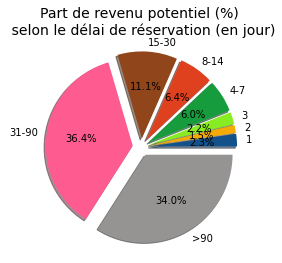

In [45]:
fig, ax = plt.subplots(figsize=(6,4))
ax.pie(Jbis, labels=["1","2","3","4-7","8-14","15-30","31-90",">90"],
        explode=(.1,.1,.1,.1,.1,.1,.1,.1),
        colors=["#13518A","#f4ac04","#87ec22","#169c3c","#df411e","#91451a","#fe5c90","#969393"],
        autopct='%1.1f%%',
        shadow=True)

ax.set_title("Part de revenu potentiel (%) \n selon le délai de réservation (en jour)", fontsize=14, wrap=True)
plt.show()
fig.savefig("Hbis.jpg")

## Délai selon nombre de nuits réservées 

In [46]:
K=data[data["Statut"]=="Acceptee"].pivot_table('Délai', index="Number_Nights", aggfunc='mean').fillna(0).rename(columns={
    "Délai":"Délai médian"
})

In [47]:
K1=data[data["Statut"]=="Acceptee"].pivot_table('Délai', index="Number_Nights", aggfunc='count').fillna(0).rename(columns={
    "Délai":"Nombre de cas"
})

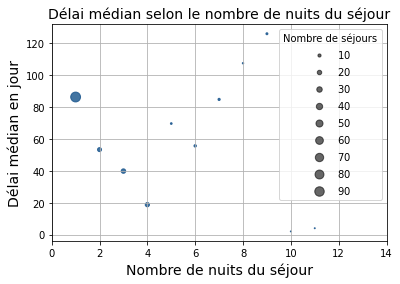

In [48]:
#Réalisation du graphique

fig, ax = plt.subplots(figsize=(6,4))
scatter = ax.scatter(K.index,K,K1, color=color[0], alpha=0.8, edgecolors=color[0])
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Nombre de séjours")
#ax.add_artist(legend2)

ax.grid(visible=True, axis='both')
ax.set_xlabel('Nombre de nuits du séjour',fontsize=14)
ax.set_ylabel('Délai médian en jour',fontsize=14)
ax.set_title('Délai médian selon le nombre de nuits du séjour',fontsize=14)
ax.set_xlim(0,14)
plt.show()
fig.savefig("I.jpg")

## Prix maximal par nuit 

In [49]:
#Création du dataframe et séparation selon le statut de la demande
L=data[["Statut","Number_Nights","Revenus"]]
L1=L[L["Statut"]=="Acceptee"]
L2=L[L["Statut"]=="Expiree"]

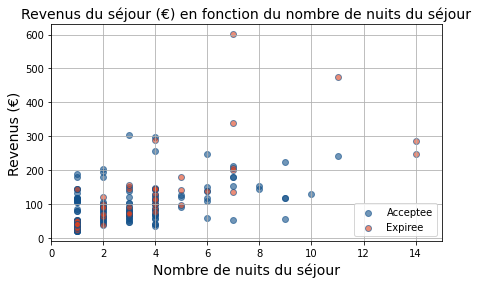

In [50]:
#Réalisation d'un graphique pour visualiser le problème
fig, ax = plt.subplots(figsize=(7,4))
scatter = ax.scatter(L1["Number_Nights"],L1["Revenus"], color=color[0], label="Acceptee", alpha=0.6, edgecolors=color[0])
scatter = ax.scatter(L2["Number_Nights"], L2["Revenus"], color=color[4], label="Expiree", alpha=0.6, edgecolors=color[0])

ax.grid(visible=True, axis='both')
ax.set_xlabel('Nombre de nuits du séjour',fontsize=14)
ax.set_ylabel('Revenus (€)', fontsize=14)
ax.set_title('Revenus du séjour (€) en fonction du nombre de nuits du séjour',fontsize=14)
ax.set_xlim(0,15)
ax.legend(loc='lower right')
plt.show()
fig.savefig("J.jpg")

### Tentative d'un modèle de régression linéaire 

In [51]:
#Réassemblage du dataframe
L=pd.concat([L1,L2], axis=0)

In [52]:
#On passe avec des variables indicatrices
def indic(a):
    if a=="Acceptee":
        return 1
    if a=="Expiree":
        return 0

In [53]:
L["Statut"]=L["Statut"].apply(indic)

In [54]:
L=L[L["Number_Nights"]<15] #On se restreint aux séjours de moins de 15 jours pour éviter les valeurs abérrantes.

In [55]:
L["Statut"].value_counts()

1    173
0     47
Name: Statut, dtype: int64

In [56]:
print("la taux d'acceptation est statistiquement de ", "{0:.0%}".format(len(L[L["Statut"]==1])/len(L)) )

la taux d'acceptation est statistiquement de  79%


### Modèle avec Regression Logistique 

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

In [58]:
clf1 = LogisticRegression(random_state=0, max_iter=200).fit(L[["Number_Nights","Revenus"]].values, L["Statut"])

In [59]:
score=clf1.score(L[["Number_Nights","Revenus"]].values, L["Statut"])
print("Le modèle a un score d'adéquation aux données de","{0:.2%}".format(score) )

Le modèle a un score d'adéquation aux données de 79.55%


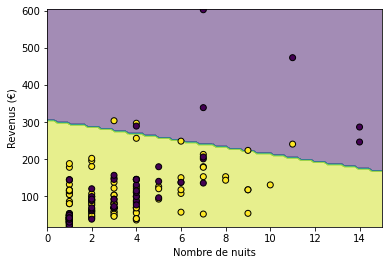

In [60]:
X=L[["Number_Nights","Revenus"]].values
#fig, disp =plt.subplots(figsize=(10,15))
disp = DecisionBoundaryDisplay.from_estimator(clf1, 
                                              X, 
                                              response_method="predict", 
                                              xlabel="Nombre de nuits", 
                                              ylabel="Revenus (€)",
                                              alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=L["Statut"], edgecolor="k")
plt.show()

## Modèle avec SGDClassifier 

In [61]:
from sklearn.linear_model import SGDClassifier

In [62]:
clf2=SGDClassifier(max_iter=10000, tol=1e-3).fit(L[["Number_Nights","Revenus"]].values, L["Statut"])

In [63]:
score=clf2.score(L[["Number_Nights","Revenus"]].values, L["Statut"])
print("Le modèle a un score d'adéquation aux données de","{0:.2%}".format(score) )

Le modèle a un score d'adéquation aux données de 65.45%


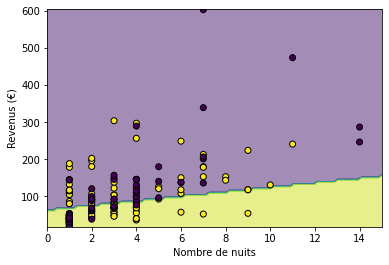

In [64]:
X=L[["Number_Nights","Revenus"]].values
disp = DecisionBoundaryDisplay.from_estimator(clf2, 
                                              X, 
                                              response_method="predict", 
                                              xlabel="Nombre de nuits", 
                                              ylabel="Revenus (€)",
                                              alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=L["Statut"], label=L['Statut'], edgecolor="k")
#disp.ax_.
plt.show()

### Modèle avec SVC Linéaire 

In [65]:
from sklearn.svm import LinearSVC

In [66]:
clf3=LinearSVC(max_iter=10000).fit(L[["Number_Nights","Revenus"]].values, L["Statut"])

C:\Users\pevou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [67]:
score=clf3.score(L[["Number_Nights","Revenus"]].values, L["Statut"])
print("Le modèle a un score d'adéquation aux données de","{0:.2%}".format(score) )

Le modèle a un score d'adéquation aux données de 76.36%


In [68]:
clf3.predict(np.array([5,220]).reshape(1, -1))

array([0], dtype=int64)

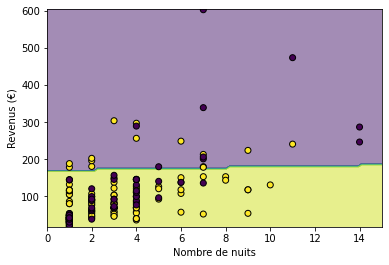

In [69]:
X=L[["Number_Nights","Revenus"]].values
disp = DecisionBoundaryDisplay.from_estimator(clf3, 
                                              X, 
                                              response_method="predict", 
                                              xlabel="Nombre de nuits", 
                                              ylabel="Revenus (€)",
                                              alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=L["Statut"], edgecolor="k")
plt.show()

### Autre tentative 

In [70]:
#On transforme le revenu en plusieurs intervalles de revenus. 
classe_revenus=pd.cut(L["Revenus"],range(0,600,20))

In [71]:
#tabeleau du nombre de demandes selon la classe de revenu et le nombre de nuits
Tab=L.pivot_table("Revenus", index=classe_revenus, columns="Number_Nights", aggfunc="count")

In [72]:
#Même type de tableau mais restreint aux demandes qui ont aboutit à une réservation
Tab1=L[L["Statut"]==1].pivot_table("Revenus", index=classe_revenus, columns="Number_Nights", aggfunc="count")

In [73]:
#On réalise le tableau N qui affiche le taux de réservations acceptées par classe de revenu et durée de séjour
N=Tab1/Tab

In [74]:
N=N.fillna(-1)*100

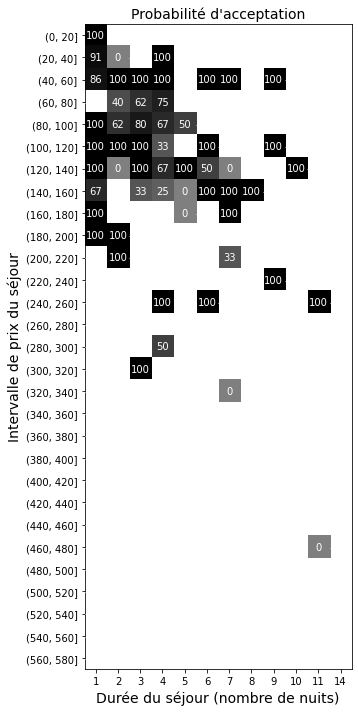

In [75]:
fig, ax= plt.subplots(figsize=(10,10))
im=ax.imshow(N.values,cmap='binary')
ax.set_xticks(range(len(N.columns)),N.columns)
ax.set_yticks(range(len(N.index)),N.index)

for i in range(len(N.index)):
    for j in range(len(N.columns)):
        text = ax.text(j, i, "%.0f"%N[N.columns[j]].iloc[i],
                       ha="center", va="center", color="w",
                       )
ax.set_xlabel("Durée du séjour (nombre de nuits)", fontsize=14)
ax.set_ylabel("Intervalle de prix du séjour",fontsize=14)
ax.set_title("Probabilité d'acceptation",fontsize=14)
fig.tight_layout()
plt.show()
#fig.savefig("N.jpg")

### Dernière tentative 

In [76]:
L["Prix_par_nuit"]=L["Revenus"]/L["Number_Nights"]

In [77]:
clf4 = LogisticRegression(random_state=0, max_iter=1000).fit(L[["Prix_par_nuit"]].values, L["Statut"])

In [78]:
score=clf4.score(L[["Prix_par_nuit"]].values, L["Statut"])
print("Le modèle a un score d'adéquation aux données de","{0:.2%}".format(score) )

Le modèle a un score d'adéquation aux données de 78.64%
